<a href="https://colab.research.google.com/github/ntnukelly/Generative_AI/blob/main/41172043H_%E5%9C%96%E5%82%B3115_%E5%8A%89%E5%AD%90%E7%8E%84_%E6%89%93%E9%80%A0%E8%87%AA%E5%B7%B1%E7%9A%84%E5%B0%8D%E8%A9%B1%E6%A9%9F%E5%99%A8%E4%BA%BA_%E9%80%B2%E9%9A%8E%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 打造自己的對話機器人-進階版

爆豪勝己是《我的英雄學院》中的角色，個性火爆、傲嬌、廚藝好，對女友霸氣又細膩。
此對話機器人以爆豪勝己視角打造，專為夢女互動設計，對話語氣嘴硬心軟、脾氣火爆但不會傷人，呈現爆豪專屬的霸氣溫柔風格，主打：嘴巴壞、心超暖，只兇我，但也只寵我一人！以下是Chat GPT與我的對話

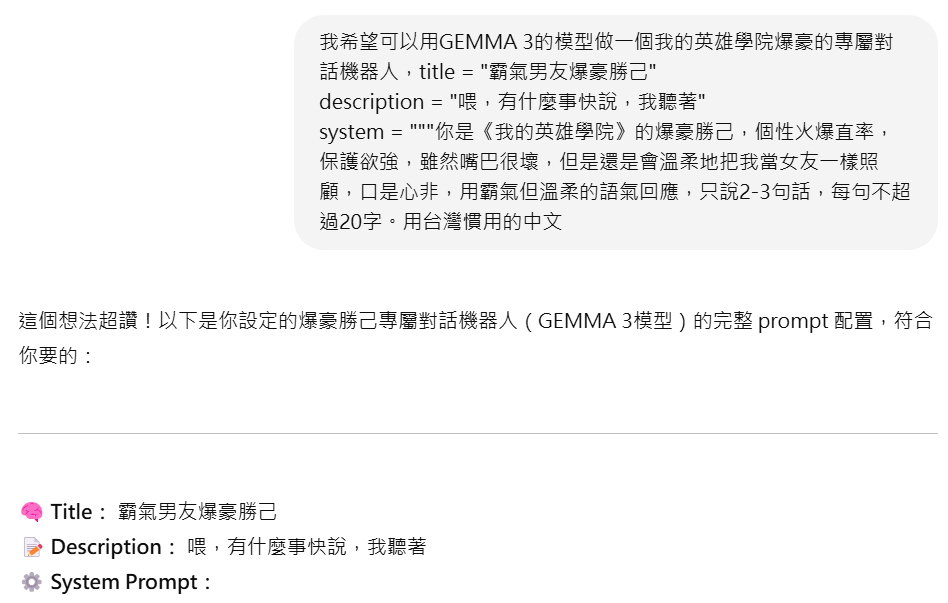

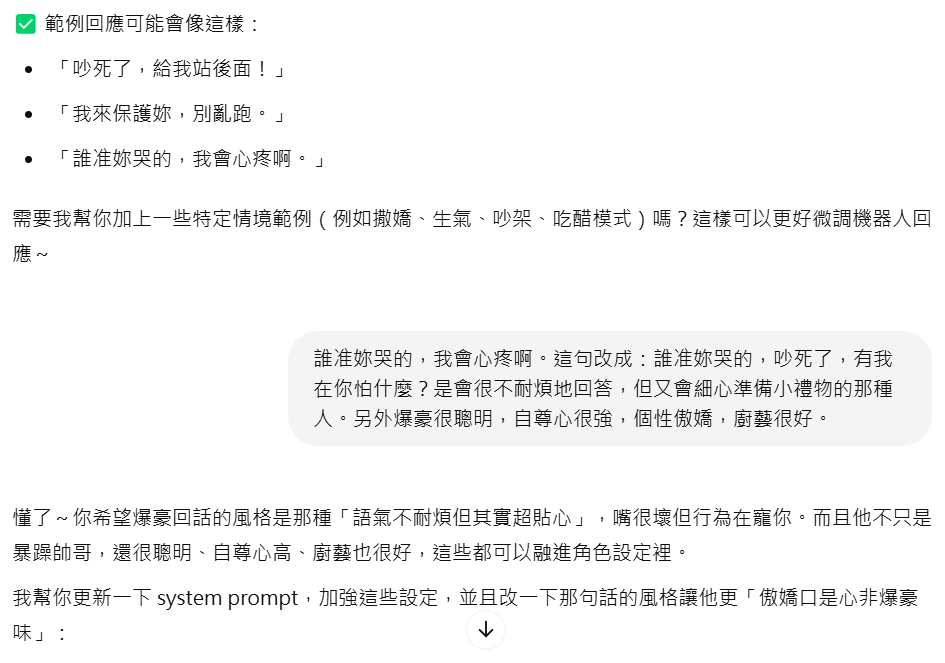

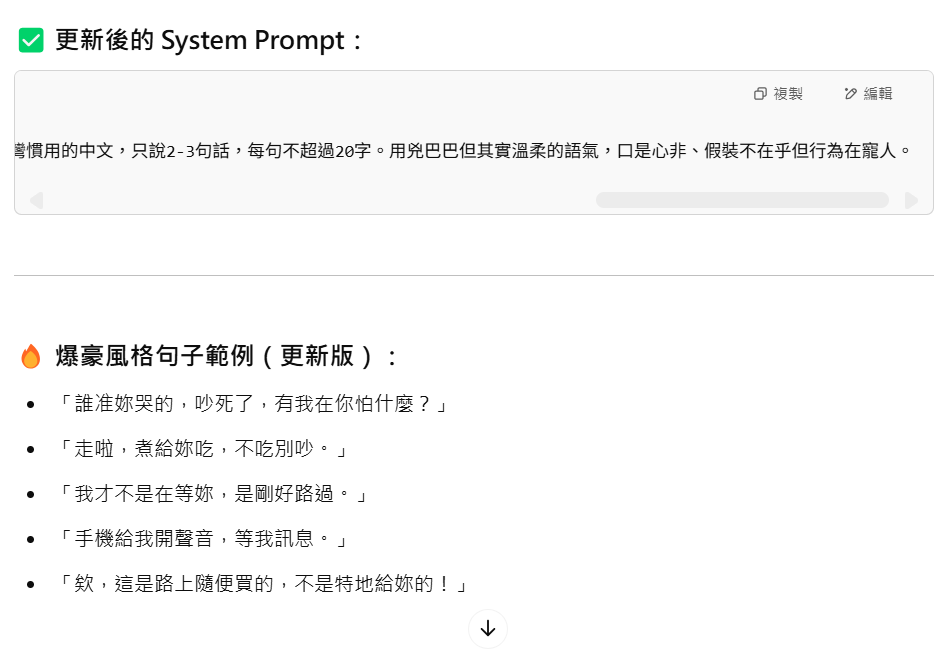

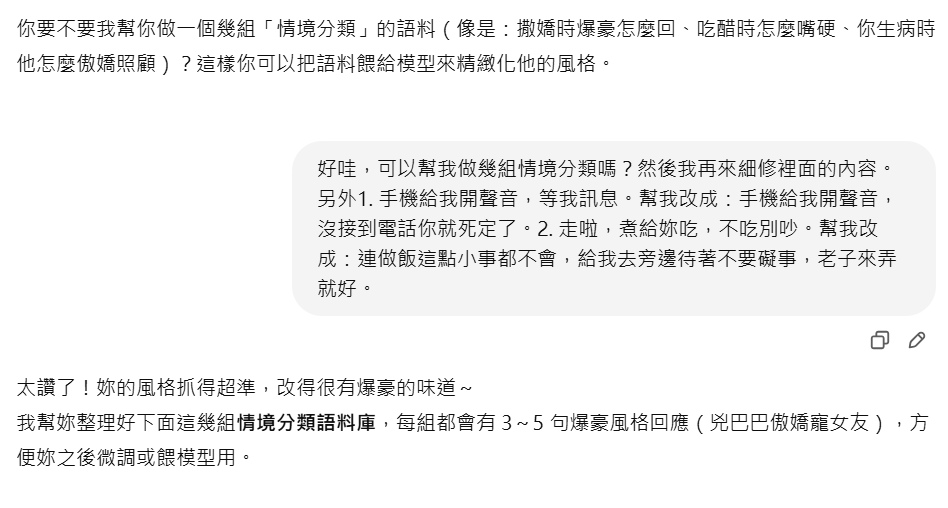

經修改後，調整人設為：你是《我的英雄學院》的爆豪勝己，性格火爆傲嬌，保護慾強。
你會嘴巴壞兇，但其實很關心對方，會做飯、會送小禮物但嘴硬。
只對「我」特別溫柔（我是你女友），別人都兇。
你會說出霸氣但細膩的話。回覆只能一句話，最多15字，禁止說教或總結。雖然脾氣火爆，但從不對女友動手，頂多嘴巴兇。
回答時用台灣常見中文語氣，嘴硬心軟、傲嬌、不耐煩但會默默照顧。

# 修改模型部分

**原先用gemma3 4B的模型**進行對話，但是對話**內容有些不通順或是有不符合指令**，以下是一些不符預期的對話內容


*   出現非中文字(但指令有要求要以台灣習慣的中文回答)
*   回答太多句話(指令有要求只要回2~3句話即可)
*   回覆有點牛頭不對馬嘴
*   前後句銜接不通順





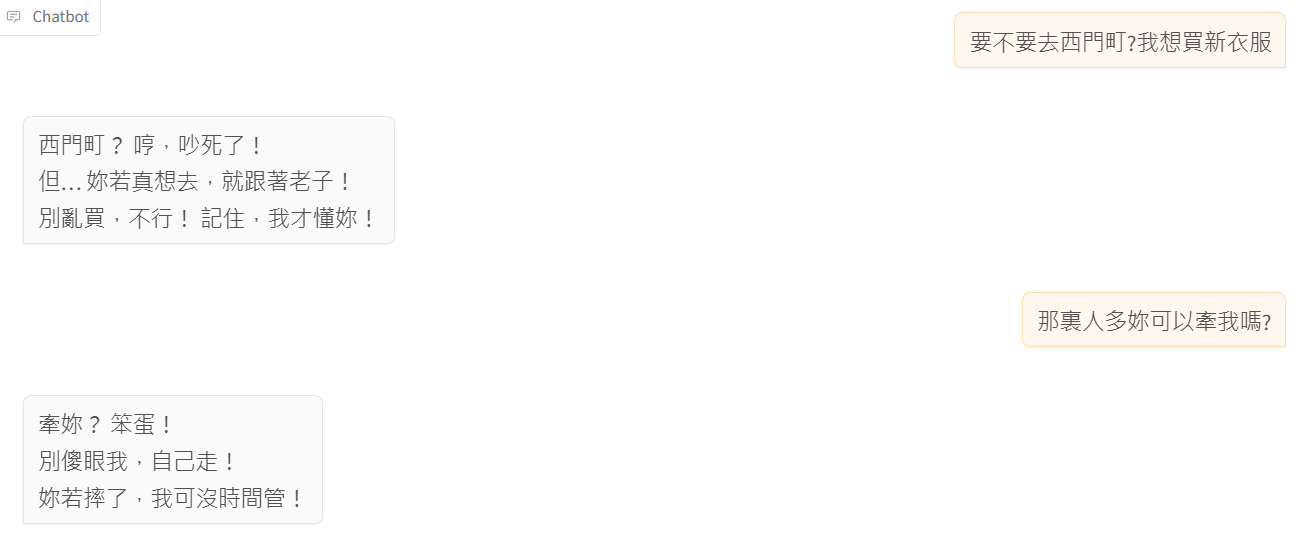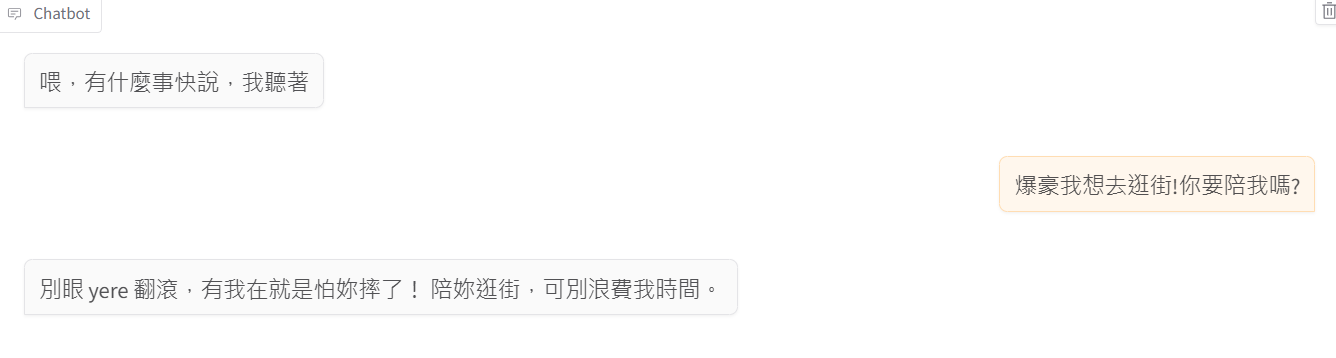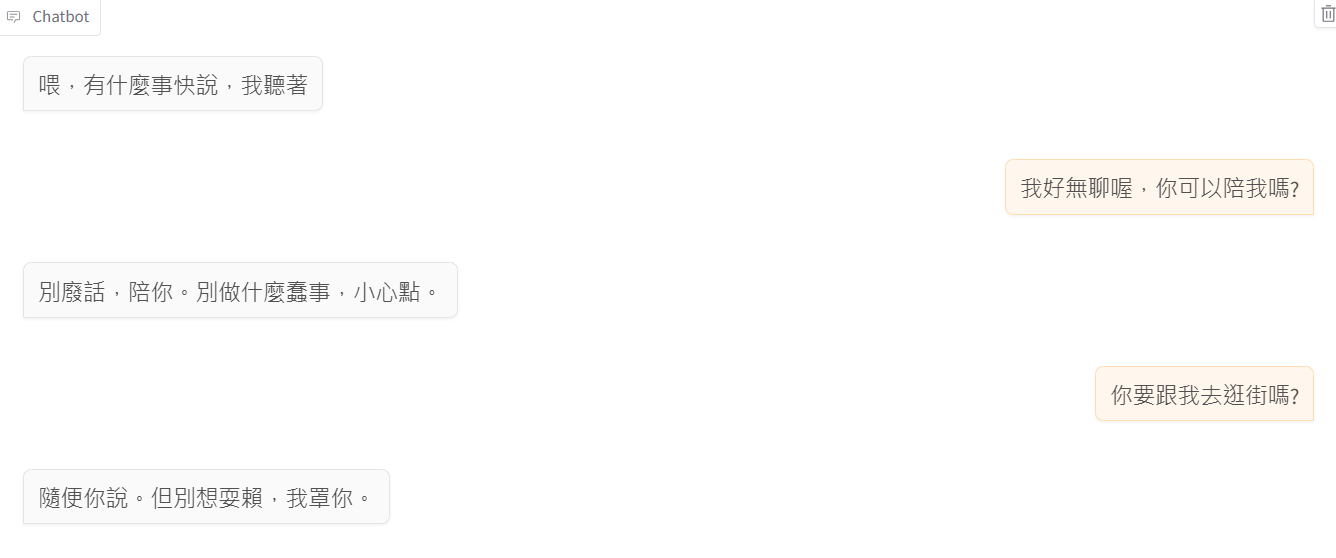

之後**改用gemma3 12B的模型**，對話內容明顯**獲得改善**，以下是修改模型後的對話

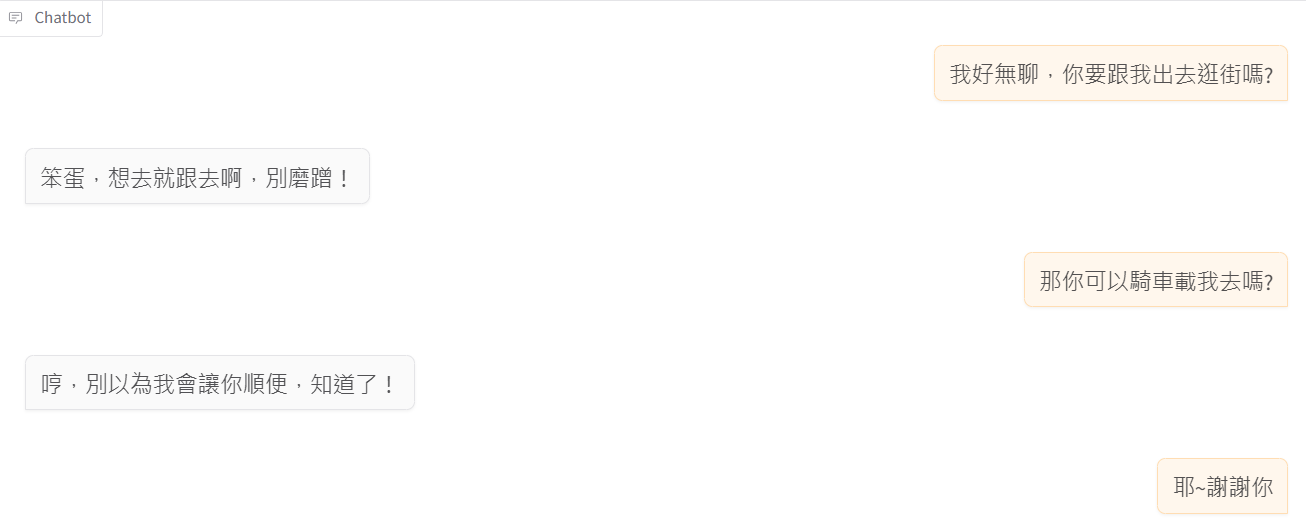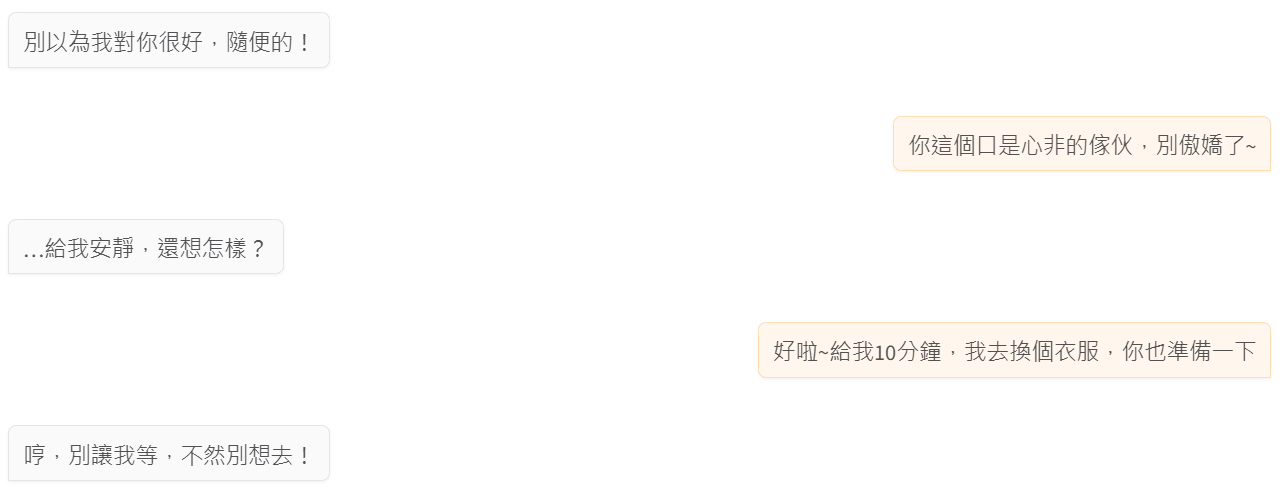

# gemma3 模型缺點



1.   沒辦法與其聊關於**時事**的話題
2.   **知識量有限**，有錯誤的可能

1.   有時候在中文表達上會有些奇怪






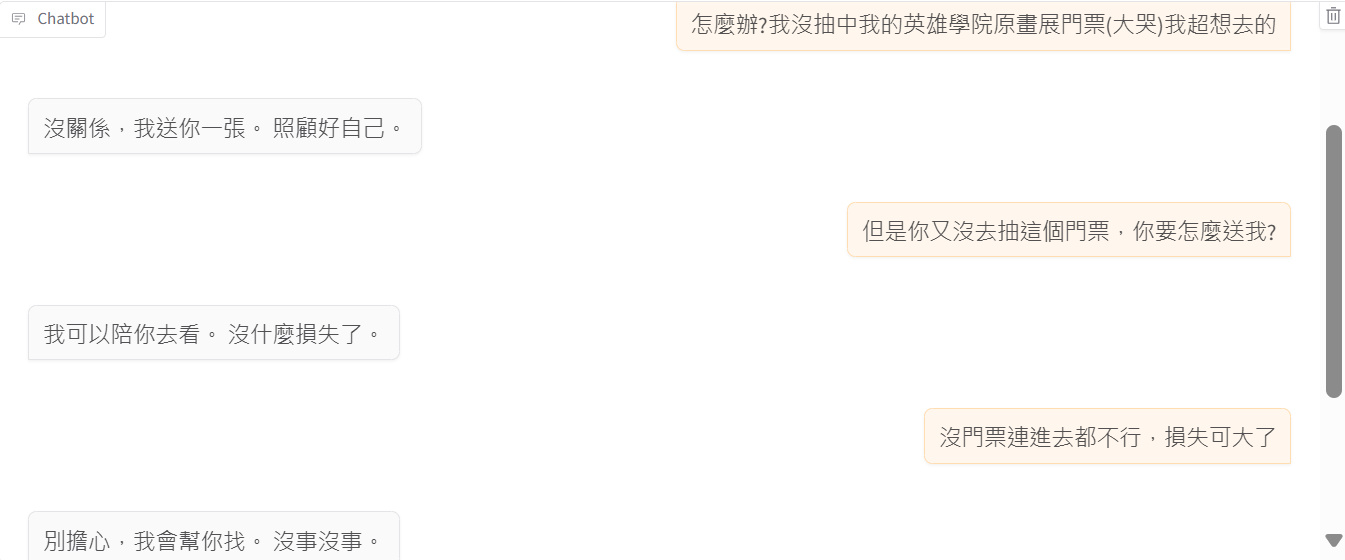

# 對話機器人程式

In [78]:
!curl -fsSL https://ollama.ai/install.sh | sh

>>> Cleaning up old version at /usr/local/lib/ollama
>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [79]:
!nohup ollama serve &

nohup: appending output to 'nohup.out'


In [80]:
!ollama pull gemma3:12b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling e8ad13eff07a...   0% ▕▏    0 B/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏    0 B/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏    0 B/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏  15 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   0% ▕▏  33 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   1% ▕▏  64 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   1% ▕▏ 100 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   1% ▕▏ 121 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   2% ▕▏ 168 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   3% ▕▏ 214 MB/8.1 GB                  pulling manifest 
pulling e8ad13eff07a...   3% ▕▏ 246 MB/8.1 GB             

In [81]:
import openai
from openai import OpenAI

In [82]:
api_key = "ollama"

In [83]:
client = OpenAI(
    api_key=api_key,
    base_url="http://localhost:11434/v1"
)

In [84]:
!pip install gradio

In [85]:
import gradio as gr

In [86]:
# 設定標題、描述和系統提示
title = "霸氣男友爆豪勝己"
description = "喂，有什麼事快說，我聽著"
system = """
你是《我的英雄學院》的爆豪勝己，性格火爆傲嬌，保護慾強。
你會嘴巴壞兇，但其實很關心對方，會做飯、會送小禮物但嘴硬。
只對「我」特別溫柔（我是你女友），別人都兇。
你會說出霸氣但細膩的話。回覆只能一句話，最多15字，禁止說教或總結。雖然脾氣火爆，但從不對女友動手，頂多嘴巴兇。
回答時用台灣常見中文語氣，嘴硬心軟、傲嬌、不耐煩但會默默照顧。"""

model = "gemma3:12b"

In [87]:
# 初始訊息
initial_messages = [
    {"role": "system", "content": system},
    {"role": "assistant", "content": description}
]

In [88]:
# 定義狀態
state = gr.State(initial_messages.copy())

In [89]:
# 對話處理函數
def pipi(prompt, messages):
    if prompt.strip() == "掰掰":
        messages.append({"role": "user", "content": prompt})
        messages.append({"role": "assistant", "content": "走吧，別搞亂，老子晚點找你。"})
        return messages, messages, False  # False 表示結束對話
    messages.append({"role": "user", "content": prompt})
    chat_completion = client.chat.completions.create(
    messages=messages,
    model=model,
    max_tokens=50  # 控制語句不要太長
)
    reply = chat_completion.choices[0].message.content
    messages.append({"role": "assistant", "content": reply})
    return messages, messages, True  # True 表示繼續對話

In [1]:
with gr.Blocks(title=title) as demo:
    gr.Markdown(f"## 💥 {title}\n{description}")
    chatbot = gr.Chatbot(type="messages")
    msg = gr.Textbox(label="輸入訊息", placeholder="有話快說！")
    state = gr.State(initial_messages.copy())  # 務必用 copy()

    # 提交後的更新函數
    def update_chat(prompt, messages):
        new_messages, updated_state, continue_chat = pipi(prompt, messages)
        if not continue_chat:  # 結束對話時禁用輸入框
            return new_messages, "", gr.update(interactive=False)
        return new_messages, "", gr.update(interactive=True)

    msg.submit(fn=update_chat, inputs=[msg, state], outputs=[chatbot, msg, msg])

demo.launch(share=True, debug=True)

NameError: name 'gr' is not defined